# Neural Network: XY -> Grayscale

> This is a simplified version of `./01_nn_xy_2_grey.ipynb` - I just took out all the diagrams and text.

## Assignment

- __Extend the model in this notebook into one which maps (X,Y) -> (R,G,B).__
- __Add at least 2 more layers to the network.__
- __Experiment with alternative activation functions and optimizers.__
- __In a paragraph or so, describe how the image we have created differs from a normal image.__

You can find other images to play with [from SciKit Image here](https://scikit-image.org/docs/dev/api/skimage.data.html), but of course you could experiment with using you're own images. For that you might want to use the [Pillow](https://pillow.readthedocs.io/en/stable/) package which has some [handy functions for loading and manipulating images](https://pillow.readthedocs.io/en/stable/reference/Image.html).

This shouldn't take you longer than an afternoon! __This will be handed in at the end of the module__ so once you have something working it would be _much appreciated_ if you go back over your code and tidy it up, maybe add comments to describe what is happening in the code.

I also recommend you make a fresh GitHub repo where you can keep your 3 small assignments and your final major assignment for the module - neatly organised.



In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt

- __Extend the model in this notebook into one which maps (X,Y) -> (R,G,B).__

If my image doesn't work, you can just replace the cat with the following line

In [52]:
import skimage.io

img = skimage.io.imread('data/my dogs.jpg')# Load my image file
#img = skimage.data.cat()

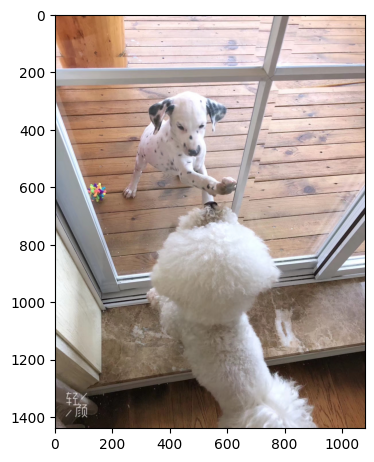

In [53]:
smaller_img = resize(img, (64, 64)) # Resize it just to make things quicker
plt.figure(figsize=(4, 8))
plt.imshow(img, cmap='gray')

In [54]:
smaller_img.shape

(64, 64, 3)

In [55]:
def get_mgrid(sidelen):
    '''Generates a flattened grid of (x,y,...) coordinates in a range of -1 to 1.'''
    width = tf.linspace(-1, 1, sidelen)
    height = tf.linspace(-1, 1, sidelen)
    mgrid = tf.stack(tf.meshgrid(width, height), axis=-1)
    mgrid = tf.reshape(mgrid, [-1, 2])
    return mgrid

In [56]:
image_side_length = smaller_img.shape[0]
X = get_mgrid(image_side_length)      # Inputs
y = tf.reshape(smaller_img, [-1, 1])  
y = y[:X.shape[0], :] # Outpus

In [57]:
# Our model!
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='sigmoid')
])
model.compile(loss='mse', optimizer='sgd')

In [58]:
model.fit(X, y, epochs=16, batch_size=64)

Epoch 1/16
64/64 [==============================] - 0s 744us/step - loss: 0.0758
Epoch 2/16
64/64 [==============================] - 0s 749us/step - loss: 0.0712
Epoch 3/16
64/64 [==============================] - 0s 774us/step - loss: 0.0670
Epoch 4/16
64/64 [==============================] - 0s 738us/step - loss: 0.0632
Epoch 5/16
64/64 [==============================] - 0s 686us/step - loss: 0.0597
Epoch 6/16
64/64 [==============================] - 0s 792us/step - loss: 0.0565
Epoch 7/16
64/64 [==============================] - 0s 635us/step - loss: 0.0536
Epoch 8/16
64/64 [==============================] - 0s 685us/step - loss: 0.0509
Epoch 9/16
64/64 [==============================] - 0s 693us/step - loss: 0.0484
Epoch 10/16
64/64 [==============================] - 0s 940us/step - loss: 0.0462
Epoch 11/16
64/64 [==============================] - 0s 798us/step - loss: 0.0441
Epoch 12/16
64/64 [==============================] - 0s 843us/step - loss: 0.0422
Epoch 13/16
64/64 [======

In [59]:
# Our traning data is stored in 'X', so lets pass that
# into our trained model and see what it produces.
prediction = model.predict(X)

128/128 [==============================] - 0s 662us/step


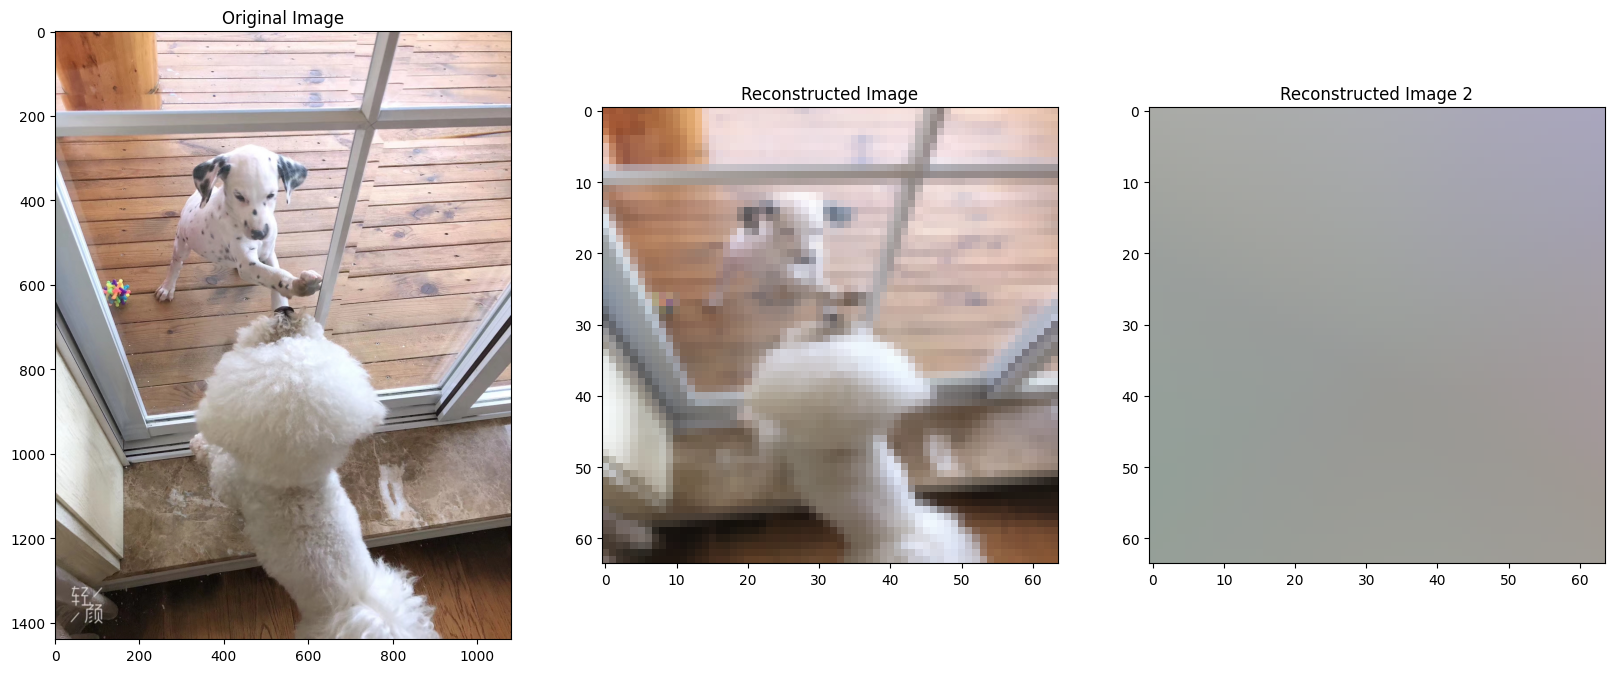

In [60]:
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (image_side_length, image_side_length, 3))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img, cmap='gray')
axes_array[0].set_title("Original Image")
axes_array[1].imshow(smaller_img, cmap='gray')
axes_array[1].set_title("Reconstructed Image")
axes_array[2].imshow(reconstructed_img, cmap='gray')
axes_array[2].set_title("Reconstructed Image 2")
plt.show()

- __In a paragraph or so, describe how the image we have created differs from a normal image.__

#### Although the reconstructed image may resemble a real-world image to some extent, 

#### it is not an accurate representation and may contain artifacts or other deviations from reality